In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import random
import pandas as pd
import os

In [18]:
root = './Kyoto/kyoto_processed/onehot'
years = list(range(2006,2016))
colors = ['#C08270', '#B66E97','#9E0142','#F57547','#FDBA6A','#FEE89A','#CBE99D','#87CFA4','#469EB4','#4E62AB']

In [4]:
def sample(data,num):
    all_id = list(range(data.shape[0]))
    sample_id = sorted(random.sample(all_id,num))
    return data[sample_id]

In [11]:
mode='train'
num=400
cats = [sample(pd.read_parquet(os.path.join(root,'{}_{}_subset_onehot.parquet'.format(year, mode))).values,num=num) for year in years]
cats =np.concatenate(cats,axis=0)

In [12]:
cats.shape

(4000, 506)

In [13]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=42).fit_transform(cats)

In [14]:
x_min, x_max = tsne.min(0), tsne.max(0)
tsne_norm = (tsne - x_min) / (x_max - x_min)

In [16]:
year_tsne = {}
for i,year in enumerate(years):
    year_tsne[year]=tsne_norm[i*num:(i+1)*num]

In [30]:
def plot_between_years(tsne1,tsne2,color1,color2):
    plt.xticks([])
    plt.yticks([])
    plt.scatter(tsne1[:, 0], tsne1[:, 1], 1, color=color1)
    plt.scatter(tsne2[:, 0], tsne2[:, 1], 1, color=color2)
#     plt.tight_layout() 

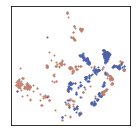

In [31]:
year1 = years[0]
year2 = years[9]
color1 = colors[0]
color2 = colors[9]
plt.figure(figsize=(2, 2))
plot_between_years(year_tsne[year1],year_tsne[year2],color1,color2)


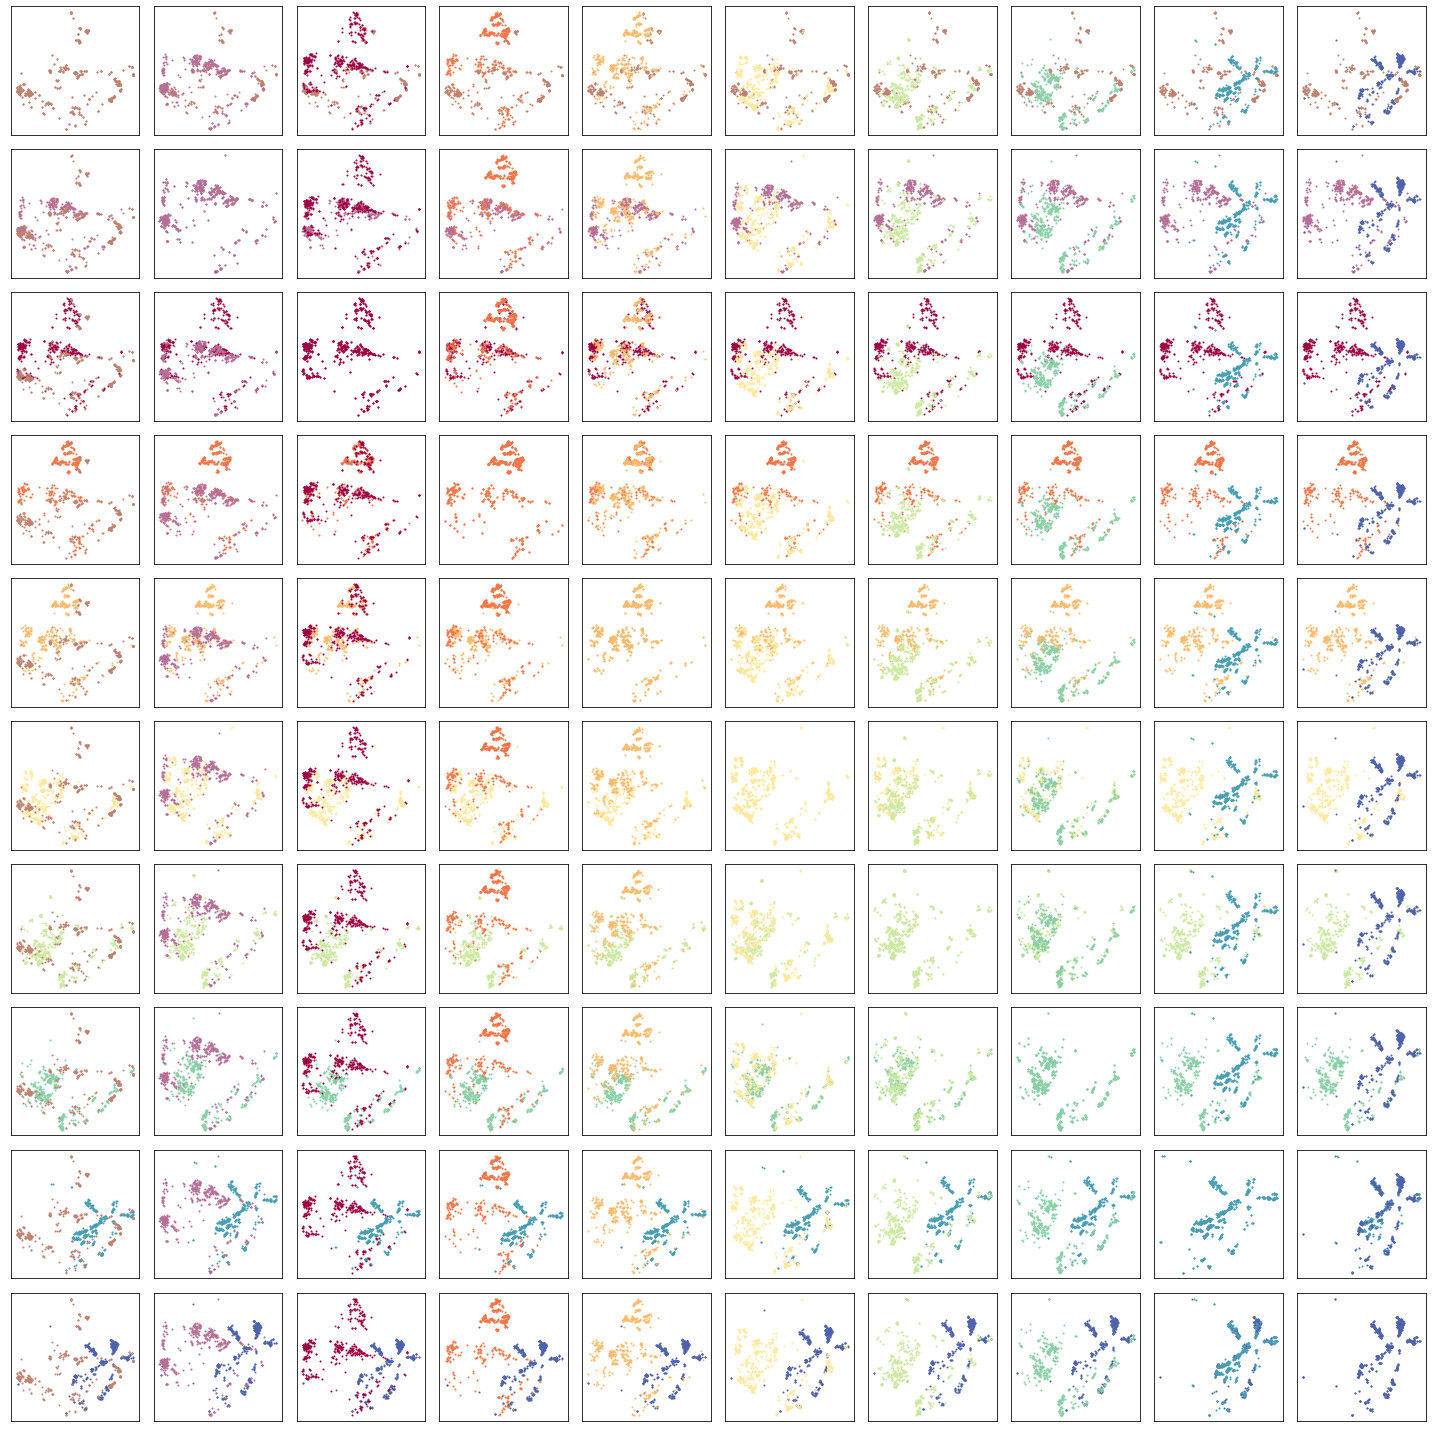

In [32]:
rows,columns = len(years),len(years)
# plt.figure(figsize=(20, 20))
fig, subplot_arr = plt.subplots(rows,columns,figsize=(20,20))
for i in range(rows):
    for j in range(columns):
        year1 = years[i]
        year2 = years[j]
        color1 = colors[i]
        color2 = colors[j]
        plt.subplot(rows,columns,i*columns+j+1)
        plot_between_years(year_tsne[year1],year_tsne[year2],color1,color2)
plt.tight_layout() 